min: 1


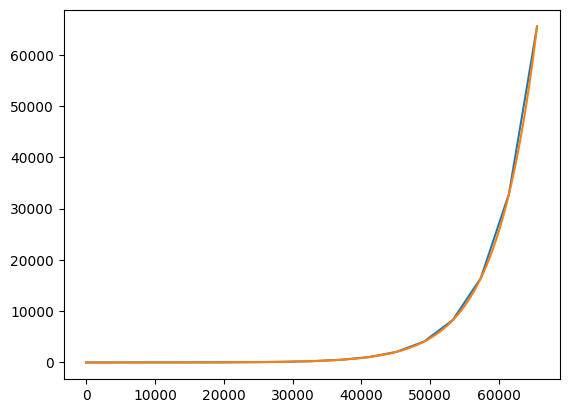

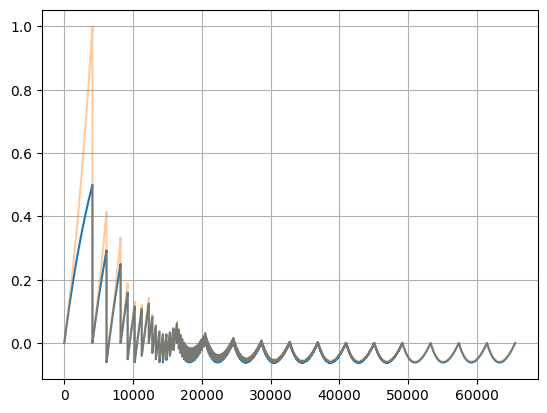

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# uint32_t e = arg / 4096;
# uint32_t s = arg & (4096 - 1);
# uint32_t comp = s > 2048 ? 4096 - s : s;
# comp = 2048 - comp;
# comp = comp * comp / 2048;
# comp = 2048 - comp;
# e = 1 << e;
# s = s * e / 4096;
# comp = comp * e / 23808;
# e = e + s - comp;
# return (uint16_t)e;

a = np.arange(65536).astype(np.uint16)
e = (a/4096).astype(np.uint32)
s = a & (4096-1)
e = 1<<e
s = (s * e / 4096).astype(np.uint32)
e = e + s
plt.plot(e)
print(f'min: {min(e)}')

n = np.exp2(a/4096)
plt.plot(n)
plt.show()
plt.plot((n - e)/n)
plt.plot((n - e)/e, alpha=0.4)
plt.grid()
plt.show()
# print(e)

glide time
minimum - 1/CR - 333 uS (1ms)
maximum - 10 S

|value| time  | freq |
|-----|-------|------|
| 00  | 1 m   | 1000 |
| 32  | 10 m  | 100  |
| 64  | 100 m | 10   |
| 96  | 1     | 1    |
| 128 | 10    | 0.1  |

integer glide - 0..65535
float glide - 0.0..128.0

425.20679614558236
2.0
11094.061440507026
105.32835060185377
105.32835060185374
[1.60000000e-01 1.68525361e+01 1.77504983e+03]
[    4   421 44376]


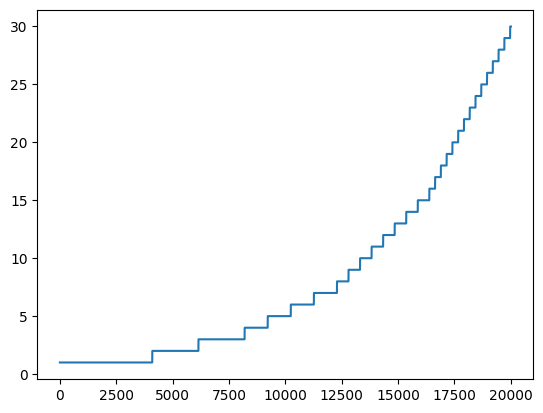

In [49]:

a = np.array((0,64,128))
a = np.exp2((a*430)/4096+2)
print(np.log2(10000)/128*4096)
print(np.log2(4))
print(a[2]/a[0])
print(a[2]/a[1])
print(a[1]/a[0])
print((a/25))
print((a).astype(np.int32))


a = np.arange(65536).astype(np.uint16)

e = (a/4096).astype(np.uint32)
s = a & (4096-1)
e = 1<<e
s = (s * e / 4096).astype(np.uint32)
e = e + s
plt.plot(e[:20000])
plt.show()

time = 3.82


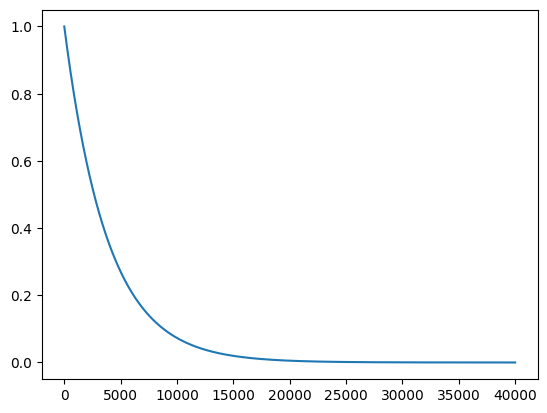

In [4]:
PERIOD_S = 40
SR = 1000
GLIDE_TIME_S = 3.82
w = 1 / SR / GLIDE_TIME_S

INIT = 1
GOAL = 0
THRSH = GOAL - (GOAL - INIT)/np.e

noise = np.random.rand(PERIOD_S * SR) - 0.5
noise *= (INIT - GOAL)/66653 # the value is the minimal possible integer

curve = np.zeros(PERIOD_S * SR)
curve[0] = INIT
for i in range(len(curve)-1):
    curve[i+1] = curve[i] + (GOAL-curve[i] + noise[i])*w

index = np.where(curve < THRSH)[0][0]
i_time = index/SR
print(f'time = {i_time}')
plt.plot(curve)
plt.show()
# plt.plot(curve[35000:])
# plt.show()

w:32768
time = 0.002


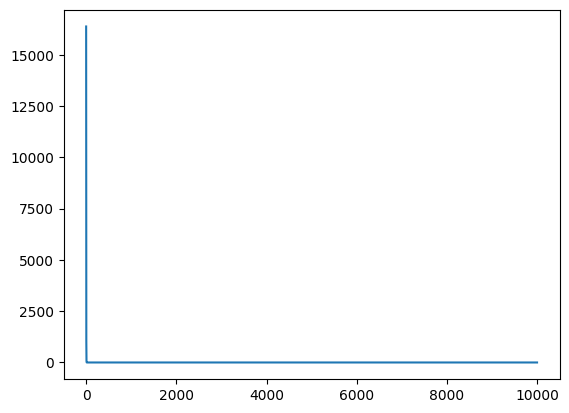

In [5]:
PERIOD_S = 10
SR = 1000
GLIDE_TIME_S = 0.002
w = int(65536 / SR / GLIDE_TIME_S)
# w=1

INIT = 2**(31-1) - 1
GOAL = 0
THRSH = int(GOAL - (GOAL - INIT)/np.e)
print(f'w:{w}')

noise = np.random.rand(PERIOD_S * SR) - 0.5
noise *= 65536 * 512
noise = noise.astype(np.int32)

curve = np.zeros(PERIOD_S * SR)
curve[0] = INIT
for i in range(len(curve)-1):
    d = (GOAL-curve[i])
    # d = d + noise[i]
    # d = d + w
    d = int(d / 65536)
    d = d * w
    # d += noise[i]
    if (d >= 2**31):
        print('bolshe!')
    else:
        if (d < -2**31):
            print('menshe!')
    curve[i+1] = curve[i] + d

index = np.where(curve < THRSH)[0][0]
i_time = index/SR
print(f'time = {i_time}')
curve = (curve/65536).astype(np.int32)
plt.plot(curve)
plt.show()
# plt.plot(curve[35000:])
# plt.show()